In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
conection = sqlite3.connect("amazon_sales.db")
df = pd.read_sql_query("""
                        SELECT *
                        FROM products
                        JOIN (
                            SELECT reviews.review_title,reviews.review_content, users.user_name,reviews.id_product,reviews.id_user
                            FROM reviews
                            JOIN users ON reviews.id_user = users.id
                        ) AS reviews_users ON products.id = reviews_users.id_product; 
                        """,conection)

In [3]:
df.head()

,id,product_name,category_1,category_2,category_3,category_4,category_5,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,img_link,product_link,review_title,review_content,user_name,id_product,id_user
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,399.0,1099.0,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Satisfied,Looks durable Charging is fine tooNo complains,Manav,B07JW9H4J1,AG3D6O4STAQKAY2UVGEUV46KN35Q
1,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,399.0,1099.0,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Charging is really fast,Charging is really fast,Adarsh gupta,B07JW9H4J1,AHMY5CWJMMK5BJRBBSNLYT3ONILA
2,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,399.0,1099.0,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Value for money,good product.,Sundeep,B07JW9H4J1,AHCTC6ULH4XB6YHDY6PCH2R772LQ
3,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,399.0,1099.0,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Product review,Till now satisfied with the quality.,S.Sayeed Ahmed,B07JW9H4J1,AGYHHIERNXKA6P5T7CZLXKVPT7IQ
4,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,399.0,1099.0,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Good quality,This is a good product . The charging speed is...,jaspreet singh,B07JW9H4J1,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q


In [4]:
df.shape

(2590, 20)

In [5]:
numeric_df = df[["discounted_price",	"actual_price",	"discount_percentage",	"rating",	"rating_count"]]

In [6]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discounted_price     2590 non-null   float64
 1   actual_price         2590 non-null   float64
 2   discount_percentage  2590 non-null   float64
 3   rating               2590 non-null   float64
 4   rating_count         2590 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 101.3 KB


# Handeling Missing Values

In [7]:
df.isna().sum()

id                     0
product_name           0
category_1             0
category_2             0
category_3             0
category_4             0
category_5             0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
img_link               0
product_link           0
review_title           0
review_content         0
user_name              0
id_product             0
id_user                0
dtype: int64

# Handeling Duplicates

In [8]:
df[df.duplicated()]

,id,product_name,category_1,category_2,category_3,category_4,category_5,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,img_link,product_link,review_title,review_content,user_name,id_product,id_user


# Preguntas Interesantes 

1. ¿Cuáles son los productos más vendidos?
2. ¿Existen patrones estacionales en las ventas?
3. ¿Qué canales de marketing son más efectivos?
4. ¿Cuál es el valor promedio de un pedido?
5. ¿Qué segmentos de clientes son más rentables?

In [9]:
products = pd.read_sql_query("""
                        SELECT *
                        FROM products; 
                        """,conection)

Best Seller

In [10]:
maximum_rating = df["rating_count"].max()

best_seller = df.loc[df["rating_count"] == maximum_rating,["product_name","img_link","product_link"]]

print(best_seller["product_name"].unique(),"\n",best_seller["img_link"].unique(),"\n",best_seller["product_link"].unique())

['AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot'] 
 ['https://m.media-amazon.com/images/I/41nPYaWA+ML._SY300_SX300_.jpg'] 
 ['https://www.amazon.in/AmazonBasics-Flexible-HDMI-Cable-3-Foot/dp/B07KSMBL2H/ref=sr_1_14?qid=1672909124&s=electronics&sr=1-14']


Segmento mas rentable

In [11]:
most_profitable = pd.read_sql_query(""" 
                        SELECT category_1, category_2, category_3, category_4, category_5, SUM(actual_price) AS total_price
                        FROM products
                        GROUP BY category_1, category_2, category_3, category_4, category_5
                        ORDER BY total_price DESC
                        LIMIT 5;
                        """,conection)

In [12]:
most_profitable

,category_1,category_2,category_3,category_4,category_5,total_price
0,Home&Kitchen,Kitchen&HomeAppliances,"Vacuum,Cleaning&Ironing",Vacuums&FloorCare,Vacuums,216809.00
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,150032.66
2,Home&Kitchen,Kitchen&HomeAppliances,"Vacuum,Cleaning&Ironing","Irons,Steamers&Accessories",Irons,77977.00
3,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,DeepFatFryers,AirFryers,60584.00
4,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Kettles&HotWaterDispensers,ElectricKettles,35087.00


# Exploring Distributions

## Numerical data

In [13]:
numerical_data = df.select_dtypes(["float64","int64"])

NOTA : ELIMINAR RATING ES UNA VARIABLE CATGORICA

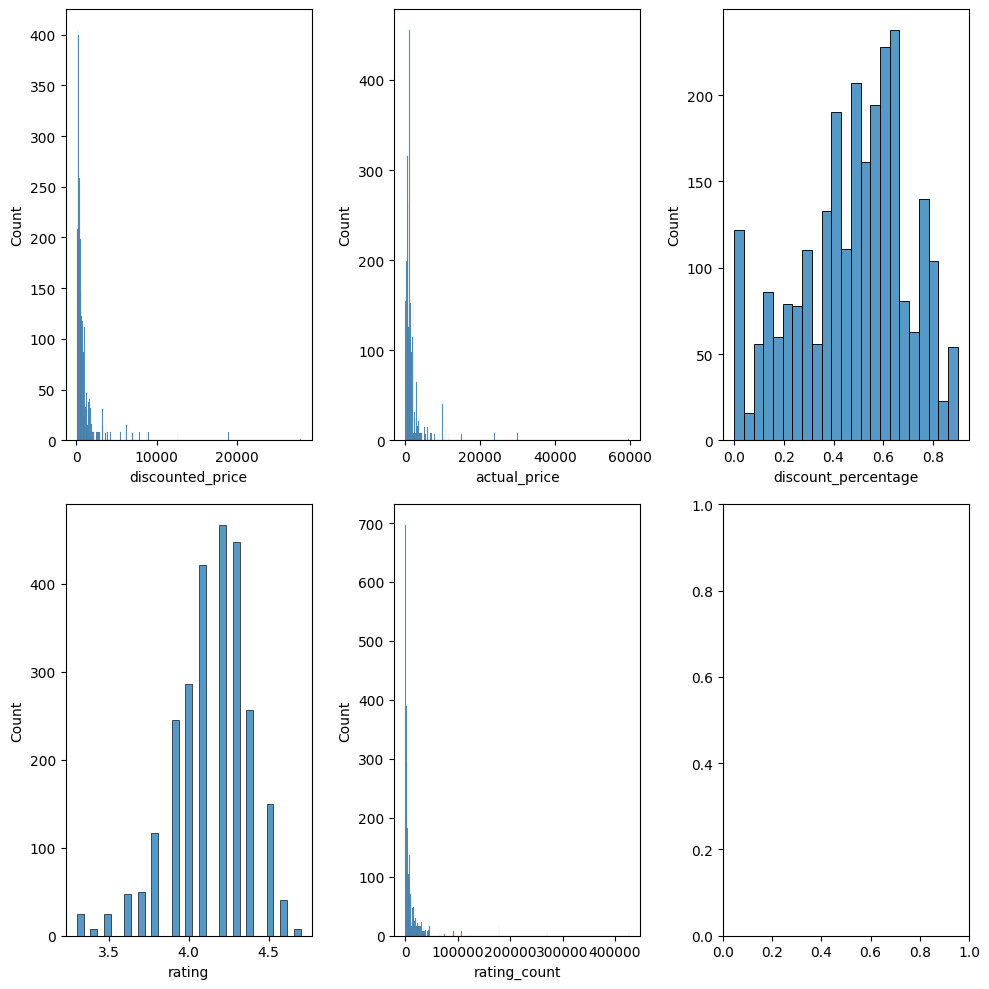

In [61]:
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(10,10))

sns.histplot(data = numerical_data["discounted_price"],ax=ax[0,0])
sns.histplot(data = numerical_data["actual_price"],ax=ax[0,1])
sns.histplot(data = numerical_data["discount_percentage"],ax=ax[0,2])
sns.histplot(data = numerical_data["rating"],ax=ax[1,0])
sns.histplot(data = numerical_data["rating_count"],ax=ax[1,1])

plt.tight_layout()
plt.show()

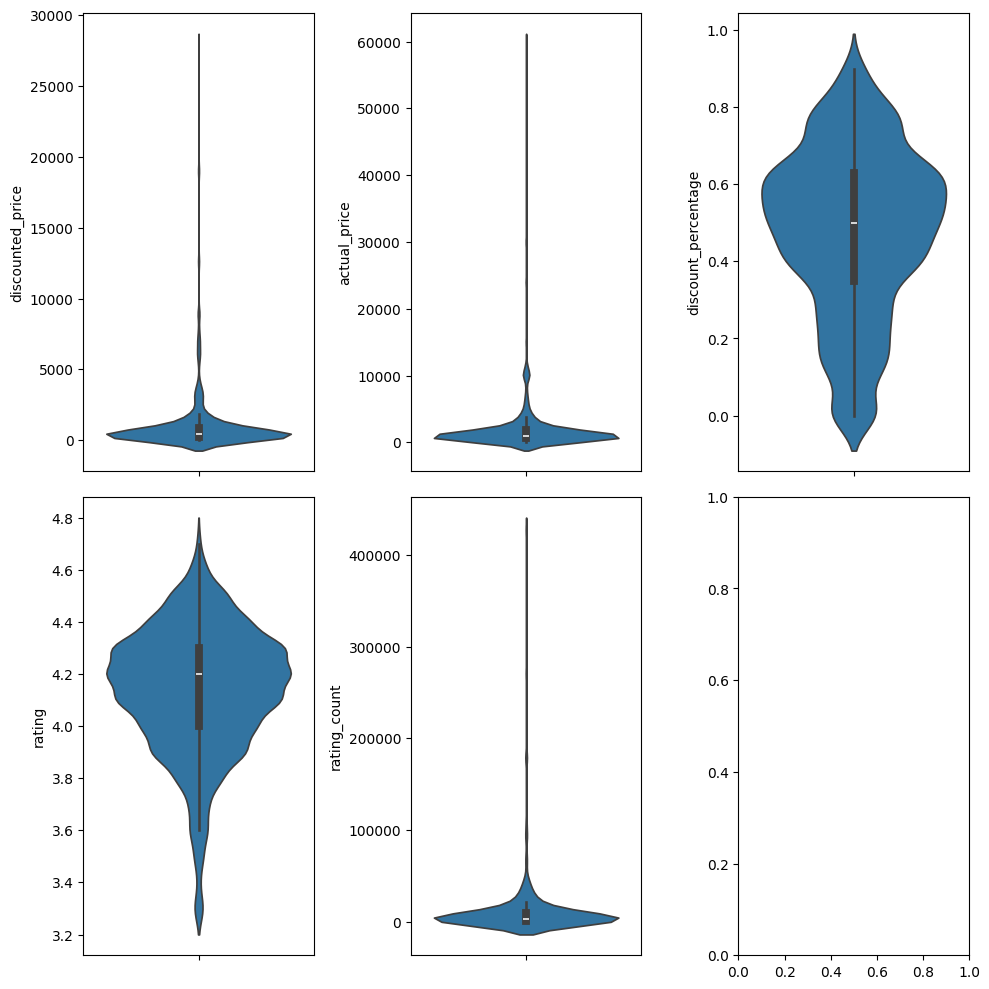

In [62]:
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(10,10))

sns.violinplot(data = numerical_data["discounted_price"],ax=ax[0,0])
sns.violinplot(data = numerical_data["actual_price"],ax=ax[0,1])
sns.violinplot(data = numerical_data["discount_percentage"],ax=ax[0,2])
sns.violinplot(data = numerical_data["rating"],ax=ax[1,0])
sns.violinplot(data = numerical_data["rating_count"],ax=ax[1,1])

plt.tight_layout()
plt.show()

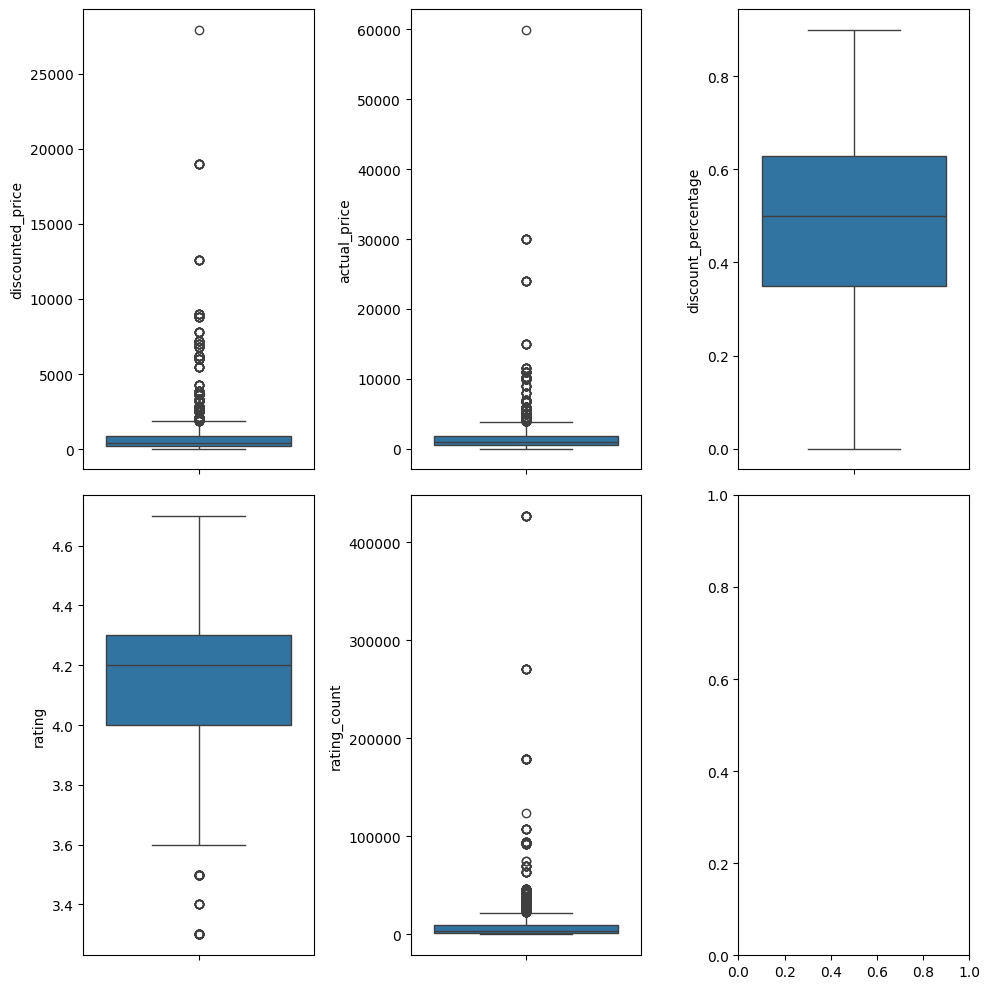

In [15]:
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(10,10))

sns.boxplot(data = numerical_data["discounted_price"],ax=ax[0,0])
sns.boxplot(data = numerical_data["actual_price"],ax=ax[0,1])
sns.boxplot(data = numerical_data["discount_percentage"],ax=ax[0,2])
sns.boxplot(data = numerical_data["rating"],ax=ax[1,0])
sns.boxplot(data = numerical_data["rating_count"],ax=ax[1,1])

plt.tight_layout()
plt.show()

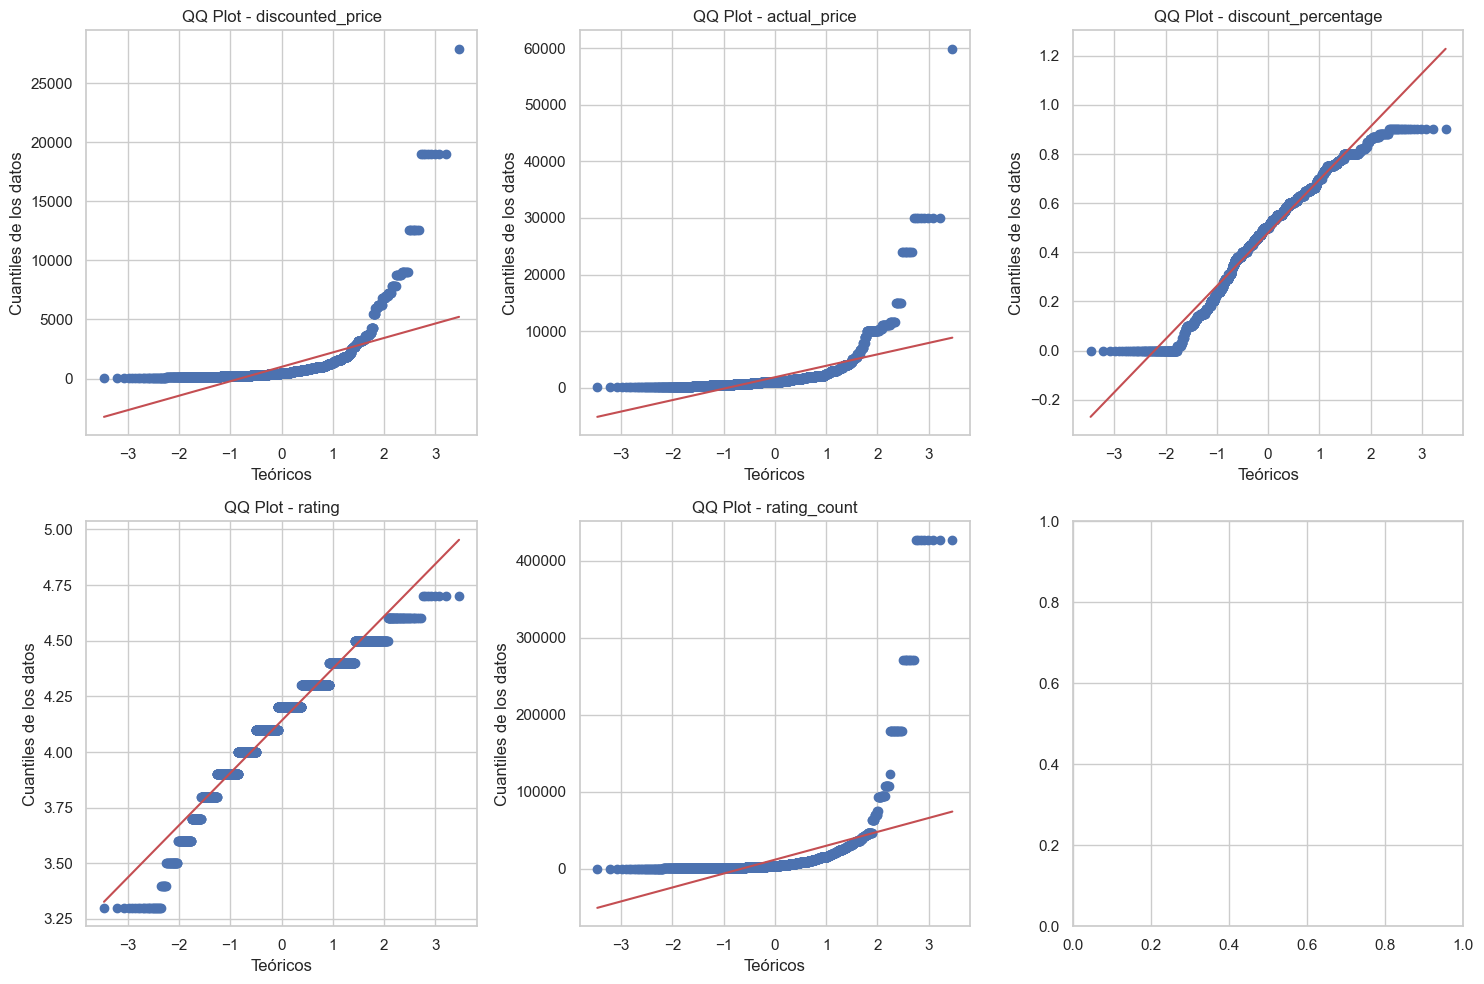

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo de datos
numerical_data = df[["discounted_price", "actual_price", "discount_percentage", "rating", "rating_count"]]

# Configuración de la figura y subplots (2 filas, 3 columnas)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.set(style="whitegrid")

# Listado de nombres de las columnas a graficar
columns = ["discounted_price", "actual_price", "discount_percentage", "rating", "rating_count"]

# Generación de cada QQ plot
for i, col in enumerate(columns):
    row, col_index = divmod(i, 3)  # Calcular fila y columna para el subplot
    stats.probplot(numerical_data[col].dropna(), dist="norm", plot=axs[row, col_index])
    axs[row, col_index].set_title(f"QQ Plot - {col}")
    axs[row, col_index].set_xlabel("Teóricos")
    axs[row, col_index].set_ylabel("Cuantiles de los datos")

# Ajuste para el layout
plt.tight_layout()
plt.show()


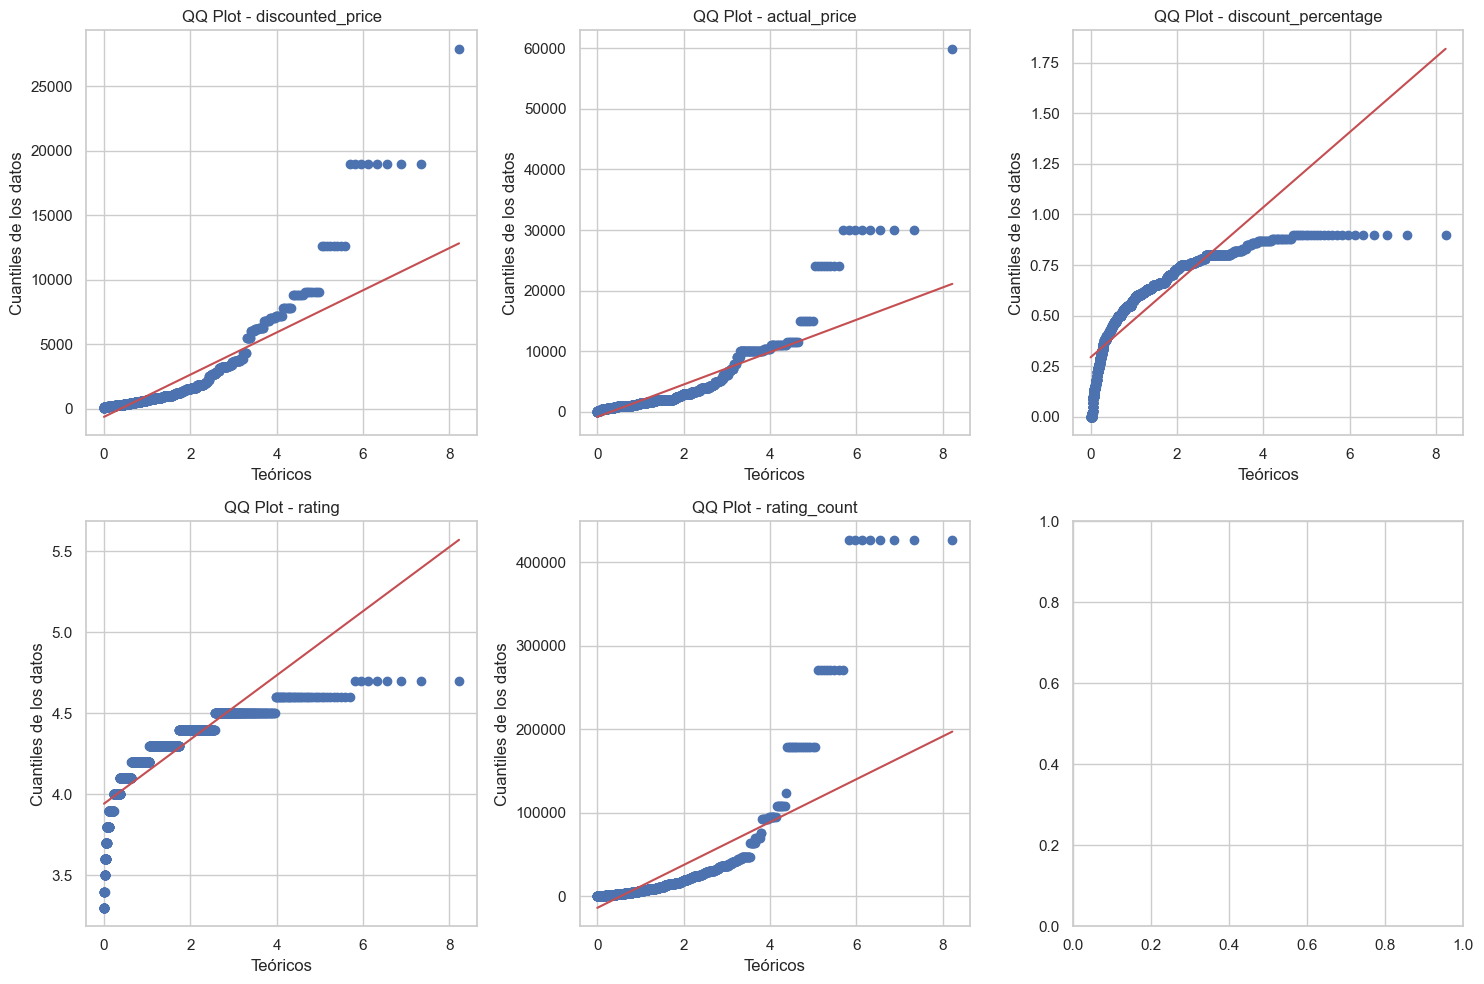

In [75]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo de datos
numerical_data = df[["discounted_price", "actual_price", "discount_percentage", "rating", "rating_count"]]

# Configuración de la figura y subplots (2 filas, 3 columnas)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
sns.set(style="whitegrid")

# Listado de nombres de las columnas a graficar
columns = ["discounted_price", "actual_price", "discount_percentage", "rating", "rating_count"]

# Generación de cada QQ plot
for i, col in enumerate(columns):
    row, col_index = divmod(i, 3)  # Calcular fila y columna para el subplot
    stats.probplot(numerical_data[col].dropna(), dist="expon", plot=axs[row, col_index])
    axs[row, col_index].set_title(f"QQ Plot - {col}")
    axs[row, col_index].set_xlabel("Teóricos")
    axs[row, col_index].set_ylabel("Cuantiles de los datos")

# Ajuste para el layout
plt.tight_layout()
plt.show()


**Summary** : 

## Categorical Data

In [63]:
categorical_data = df[["category_1","category_2","category_3","category_4","category_5"]]

### Categoria 1

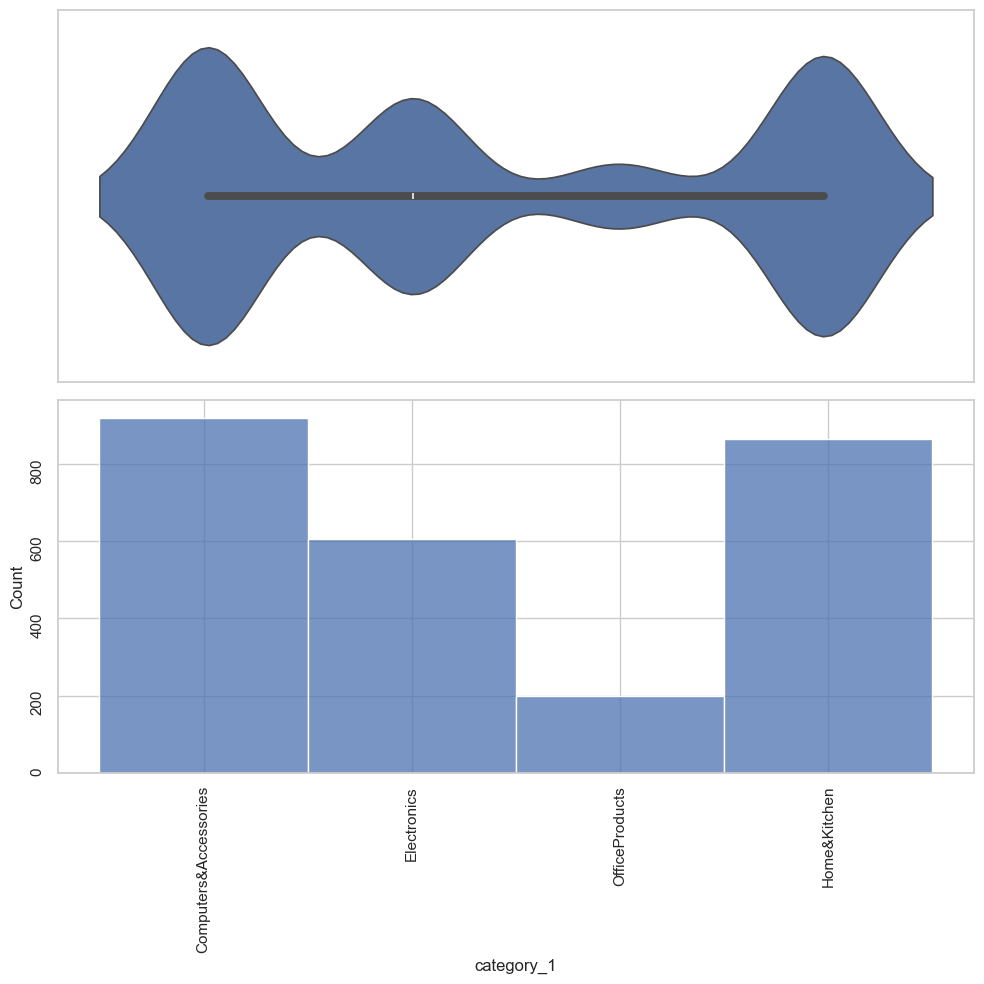

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tu DataFrame 'categorical_data' cargado.

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Diagrama de violín
sns.violinplot(x=categorical_data["category_1"], ax=ax[0])
ax[0].set_xticks([])  # Oculta los ticks del eje x
ax[0].set_xlabel('')  # Oculta la etiqueta del eje x

# Diagrama de caja
sns.histplot(data=categorical_data["category_1"], ax=ax[1])
ax[1].tick_params(labelrotation=90)
# No ocultamos ticks y etiquetas del eje x para el último gráfico

plt.tight_layout()
plt.show()


### Ctegoria 2

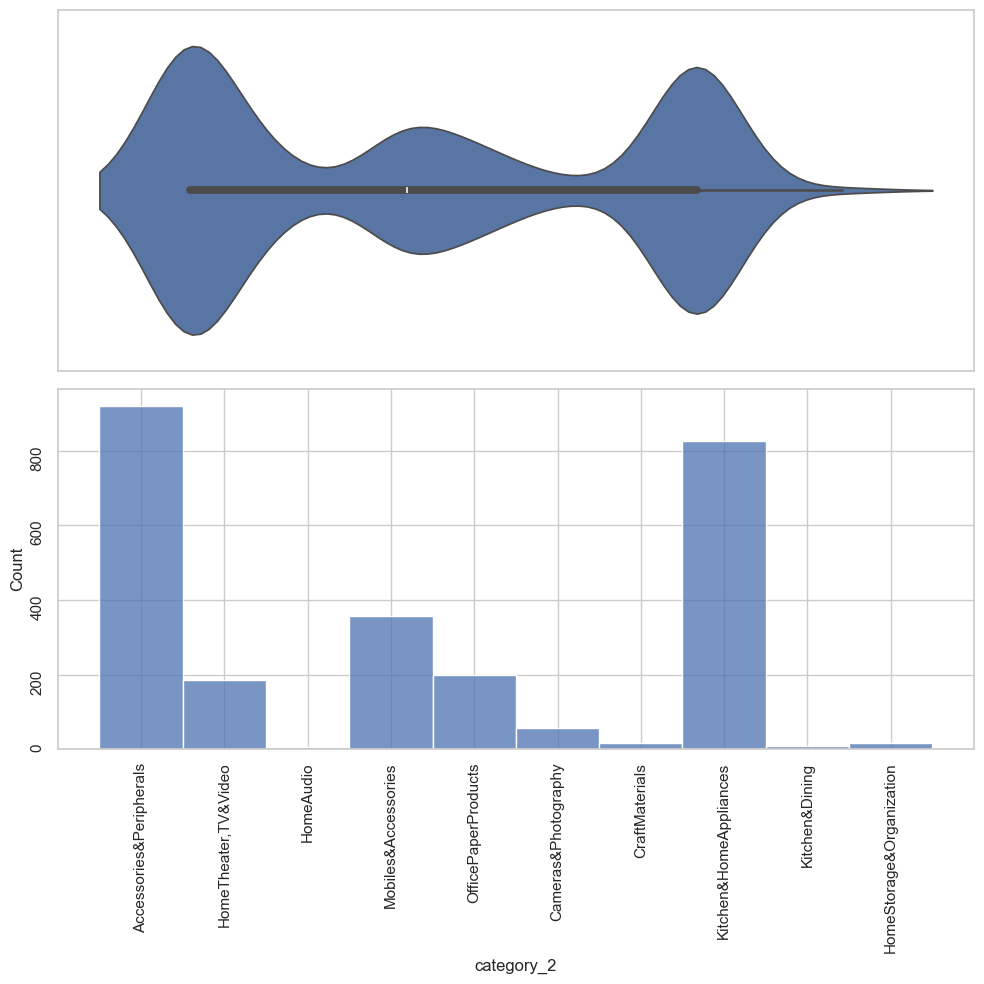

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tu DataFrame 'categorical_data' cargado.

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Diagrama de violín
sns.violinplot(x=categorical_data["category_2"], ax=ax[0])
ax[0].set_xticks([])  # Oculta los ticks del eje x
ax[0].set_xlabel('')  # Oculta la etiqueta del eje x

# Diagrama de caja
sns.histplot(data=categorical_data["category_2"], ax=ax[1])
ax[1].tick_params(labelrotation=90)
# No ocultamos ticks y etiquetas del eje x para el último gráfico

plt.tight_layout()
plt.show()


### Categoria 3

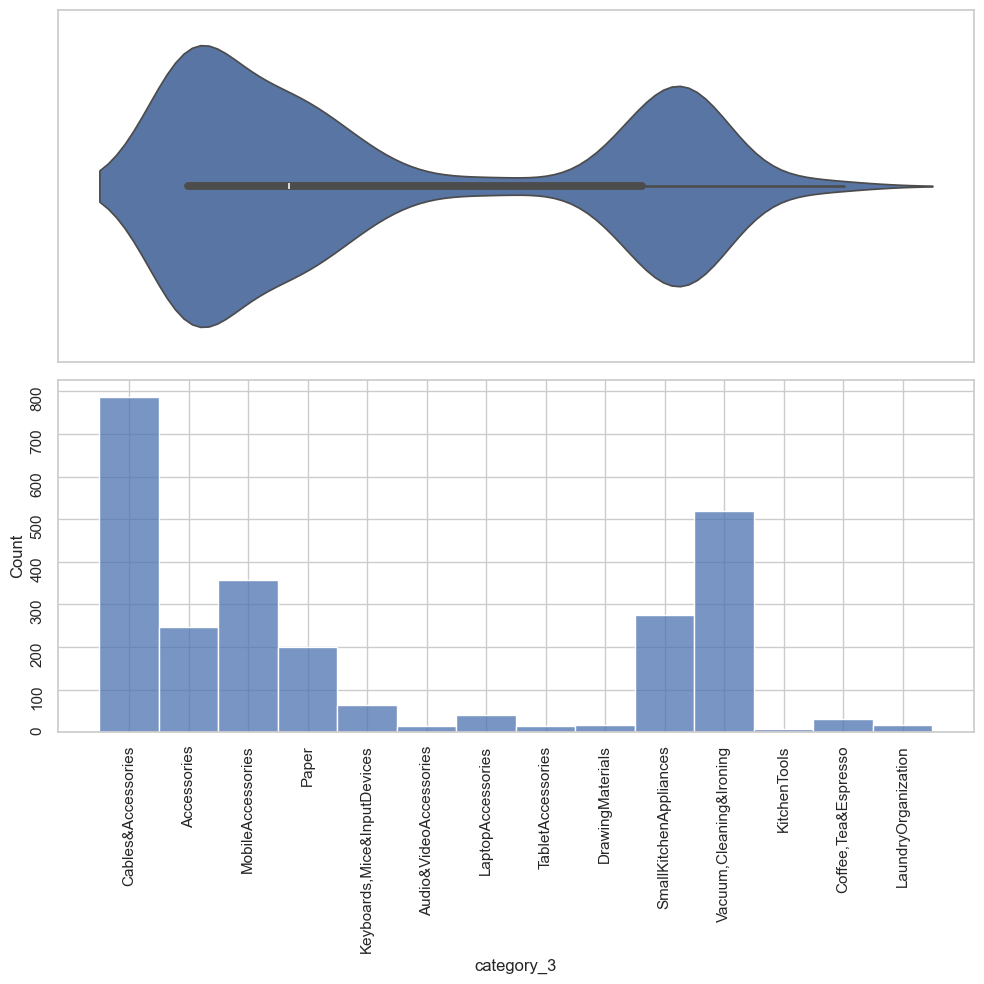

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tu DataFrame 'categorical_data' cargado.

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Diagrama de violín
sns.violinplot(x=categorical_data["category_3"], ax=ax[0])
ax[0].set_xticks([])  # Oculta los ticks del eje x
ax[0].set_xlabel('')  # Oculta la etiqueta del eje x

# Diagrama de caja
sns.histplot(data=categorical_data["category_3"], ax=ax[1])
ax[1].tick_params(labelrotation=90)
# No ocultamos ticks y etiquetas del eje x para el último gráfico

plt.tight_layout()
plt.show()


### Categoria 4

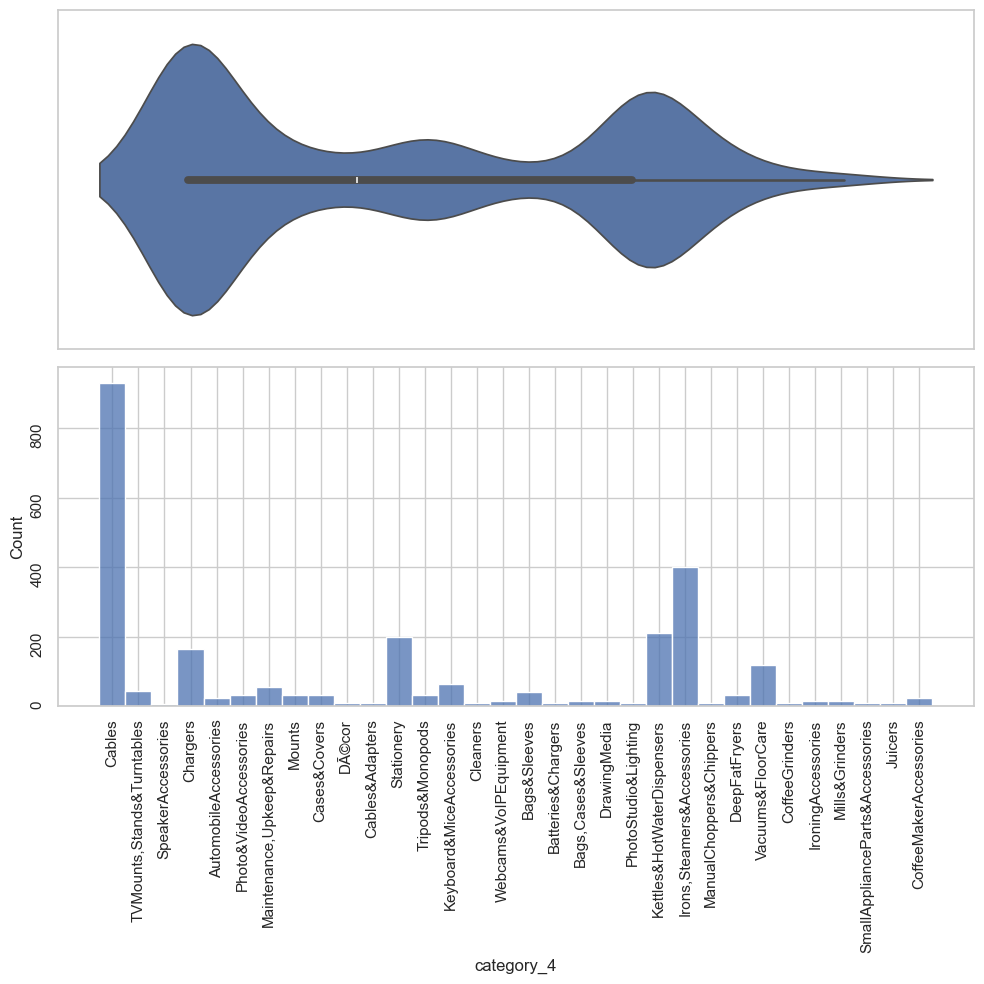

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tu DataFrame 'categorical_data' cargado.

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Diagrama de violín
sns.violinplot(x=categorical_data["category_4"], ax=ax[0])
ax[0].set_xticks([])  # Oculta los ticks del eje x
ax[0].set_xlabel('')  # Oculta la etiqueta del eje x

# Diagrama de caja
sns.histplot(data=categorical_data["category_4"], ax=ax[1])
ax[1].tick_params(labelrotation=90)
# No ocultamos ticks y etiquetas del eje x para el último gráfico

plt.tight_layout()
plt.show()


### Categoria 5

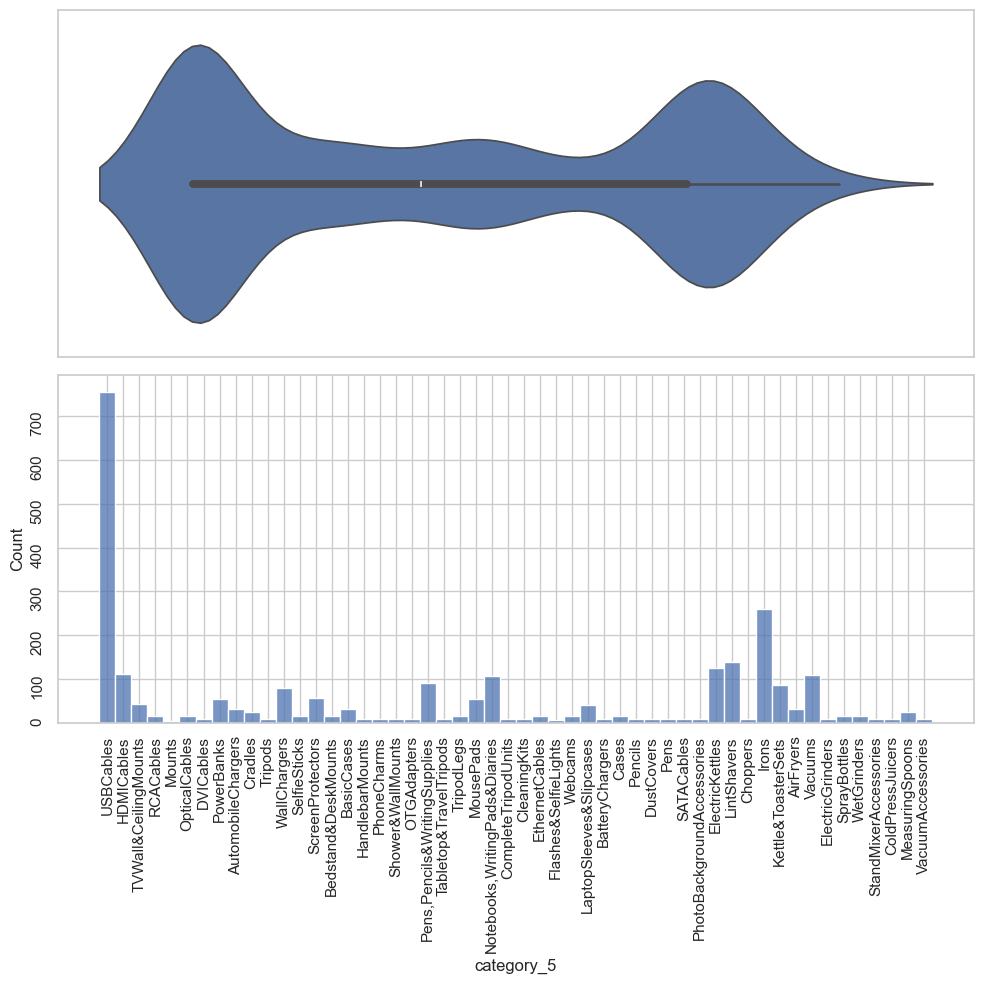

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tu DataFrame 'categorical_data' cargado.

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Diagrama de violín
sns.violinplot(x=categorical_data["category_5"], ax=ax[0])
ax[0].set_xticks([])  # Oculta los ticks del eje x
ax[0].set_xlabel('')  # Oculta la etiqueta del eje x

# Diagrama de caja
sns.histplot(data=categorical_data["category_5"], ax=ax[1])
ax[1].tick_params(labelrotation=90)
# No ocultamos ticks y etiquetas del eje x para el último gráfico

plt.tight_layout()
plt.show()


# Handeling Ouliers

A continuacion se utilizara el z-score sobre las frecuencias para determinar cual frecuencia puede ser considerada como outlier

In [17]:
# calcula la tabla de frecuencias de cada categoria
category_1 = categorical_data["category_1"].value_counts()
category_2 = categorical_data["category_2"].value_counts()
category_3 = categorical_data["category_3"].value_counts()
category_4 = categorical_data["category_4"].value_counts()
category_5 = categorical_data["category_5"].value_counts()

In [27]:
category_1.values

array([920, 866, 605, 199], dtype=int64)

In [28]:
# calcula el zscore de la categoria
def categoric_z_score(categorie):
    mean = sum(categorie.values)/len(categorie)
    suma = 0    
    zvalues = {}
    for key,value in categorie.items():
        suma += (value-mean)**2
    
    sd = np.sqrt(suma/len(categorie))

    for key ,value in categorie.items():
        zvalues[key] = (value - mean)/sd
    return zvalues

In [29]:
category_1 = categoric_z_score(category_1)
category_2 = categoric_z_score(category_2)
category_3 = categoric_z_score(category_3)
category_4 = categoric_z_score(category_4)
category_5 = categoric_z_score(category_5)

categories = {"categoria_1":category_1,"categoria_2":category_2,"categoria_3":category_3,"categoria_4":category_4,"categoria_5":category_5}
outliers = {}
for key1,category in categories.items():
    for key2,value in category.items():
        if abs(value) > 3:
            # Si la clave ya existe en el diccionario, agregamos el valor a la lista
            if key1 in outliers:
                outliers[key1].append(key2)
            # Si la clave no existe, creamos una nueva lista con el valor
            else:
                outliers[key1] = [key2]

for key,value in outliers.items():
    print(f"{key} : {value}\n\n")

categoria_4 : ['Cables']


categoria_5 : ['USBCables']




**Summary**: Observo que existen solamente 2 ouliers que perteneces a la categoria 4 y la 5 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2604\2882271277.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_yticklabels([label.get_text()[:5] + '...' for label in a.get_yticklabels()])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2604\2882271277.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_yticklabels([label.get_text()[:5] + '...' for label in a.get_yticklabels()])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2604\2882271277.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_yticklabels([label.get_text()[:5] + '...' for label in a.get_yticklabels()])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2604\2882271277.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. 

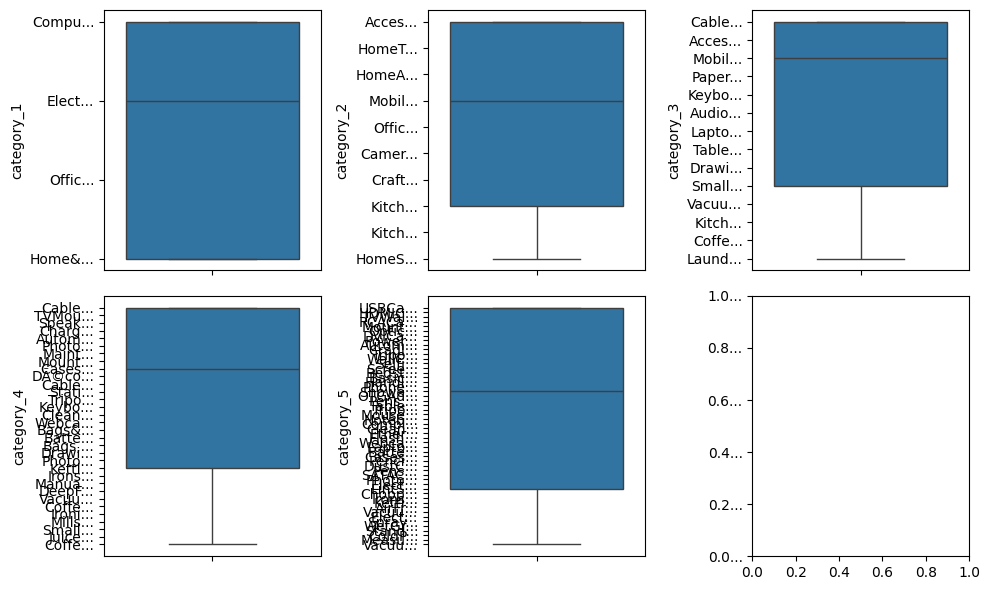

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

sns.boxplot(data=categorical_data["category_1"], ax=ax[0, 0])
sns.boxplot(data=categorical_data["category_2"], ax=ax[0, 1])
sns.boxplot(data=categorical_data["category_3"], ax=ax[0, 2])
sns.boxplot(data=categorical_data["category_4"], ax=ax[1, 0])
sns.boxplot(data=categorical_data["category_5"], ax=ax[1, 1])

# Recortar etiquetas del eje y en cada gráfico con puntos suspensivos
for a in ax.flat:
    a.set_yticklabels([label.get_text()[:5] + '...' for label in a.get_yticklabels()])

plt.tight_layout()
plt.show()


<Axes: ylabel='category_1'>

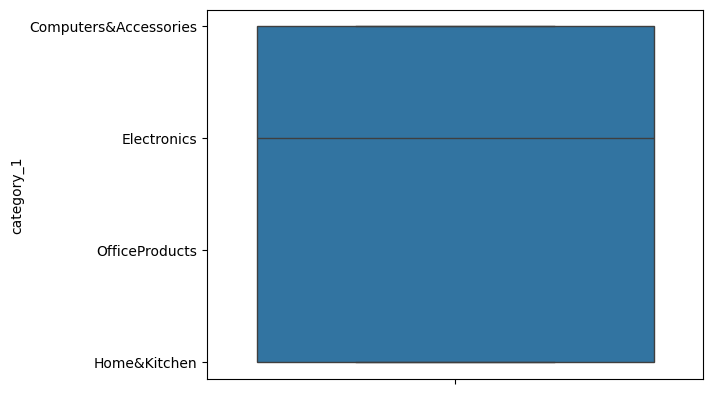

In [ ]:
sns.boxplot(data = categorical_data["category_1"])

In [ ]:
import numpy
numpy.__version__

'1.26.1'